### Setting paths and imports

In [1]:
import sys
import os
import pandas as pd

module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
module_path

'c:\\Projects\\AIIM\\gretel-demo\\GRETEL'

In [2]:
os.chdir(module_path)

In [3]:
from src.utils.context import Context
from src.data_analysis.future.data_analyzer import DataAnalyzer as data_analyzer
from src.evaluation.future.evaluator_manager_triplets import EvaluatorManager

In [4]:
config_f_name = 'tcr_tco_obs.json'

### Evaluating the explainer

In [5]:
config_path = os.path.join(module_path, 'lab', 'config', config_f_name)
runno = 1
    
print(f"Generating context for: {config_path}")
context = Context.get_context(config_path)
context.run_number = runno

context.logger.info(f"Executing: {context.config_file} Run: {context.run_number}")
context.logger.info("Creating the evaluation manager....................................")

context.logger.info("Creating the evaluators......................................................")
eval_manager = EvaluatorManager(context)

context.logger.info(
    "Evaluating the explainers............................................................."
)
eval_manager.evaluate()

Generating context for: c:\Projects\AIIM\gretel-demo\GRETEL\lab\config\TCR_TCO_OBS.json
,-1193695100 | INFO | 19732 - Executing: c:\Projects\AIIM\gretel-demo\GRETEL\lab\config\TCR_TCO_OBS.json Run: 1
,-1193695070 | INFO | 19732 - Creating the evaluation manager....................................
,-1193695052 | INFO | 19732 - Creating the evaluators......................................................
,-1193694965 | INFO | 19732 - Loading: TreeCyclesRand-266bb3721206805597afc8c4184fe0ab
,-1193694908 | INFO | 19732 - Created: TreeCyclesRand-266bb3721206805597afc8c4184fe0ab
,-1193694868 | INFO | 19732 - Creating: TreeCyclesOracle-8f8e216deff127e0218ff13e1490c1a2
,-1193694849 | INFO | 19732 - TreeCyclesOracle trained in: 0.0 secs
,-1193694817 | INFO | 19732 - Saved: TreeCyclesOracle-8f8e216deff127e0218ff13e1490c1a2
,-1193694784 | INFO | 19732 - Created: TreeCyclesOracle-8f8e216deff127e0218ff13e1490c1a2
,-1193694773 | INFO | 19732 - Instantiating: src.explainer.heuristic.obs_dist.Obliviou

### Aggregating the stats

In [6]:
results_path = os.path.join(module_path, 'lab', 'output', 'results')
stats_file_path = os.path.join(module_path, 'lab', 'stats', 'results.csv')
res = data_analyzer.create_aggregated_dataframe(results_path)
res.to_csv(stats_file_path)
res

,scope,dataset,oracle,explainer,Runtime,Runtime-std,GraphEditDistance,GraphEditDistance-std,Correctness,Correctness-std,OracleCalls,OracleCalls-std,OracleAccuracy,OracleAccuracy-std,Sparsity,Sparsity-std,Fidelity,Fidelity-std,Instability,Instability-std
0,xai-ens,TreeCyclesRand-266bb3721206805597afc8c4184fe0ab,TreeCyclesOracle-8f8e216deff127e0218ff13e1490c1a2,ExplanationBidirectionalSearch,5.706859,0.0,1.230769,0.0,1.0,0.0,1621.230769,0.0,1.0,0.0,0.029307,0.0,1.0,0.0,1.016412,0.0
1,xai-ens,TreeCyclesRand-266bb3721206805597afc8c4184fe0ab,TreeCyclesOracle-8f8e216deff127e0218ff13e1490c1a2,ObliviousBidirectionalSearchExplainer,0.029799,0.0,1.461538,0.0,1.0,0.0,68.461538,0.0,1.0,0.0,0.034780,0.0,1.0,0.0,1.017029,0.0


### Visualizing individual instances

In [7]:
evaluator = eval_manager.evaluators[0]
evaluator

#### Acyclic Instance

In [12]:
instance_id = 2

exp = evaluator.explanations[instance_id]
og_inst = exp.input_instance
cf_inst = exp.counterfactual_instances[0]

In [13]:
changes = data_analyzer.get_cf_changes(og_inst, cf_inst, False)

for action, elements in changes.items():
    print(f'{action}: {elements}') 

common nodes: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]
common edges: [(0, 2), (1, 20), (1, 22), (2, 10), (2, 21), (2, 23), (3, 14), (3, 27), (4, 6), (4, 14), (5, 11), (5, 24), (6, 15), (6, 17), (6, 22), (7, 25), (8, 13), (9, 22), (12, 22), (12, 25), (13, 18), (13, 19), (13, 24), (15, 26), (16, 23), (18, 25), (19, 21)]
added nodes: []
added edges: [(6, 18)]
removed nodes: []
removed edges: []


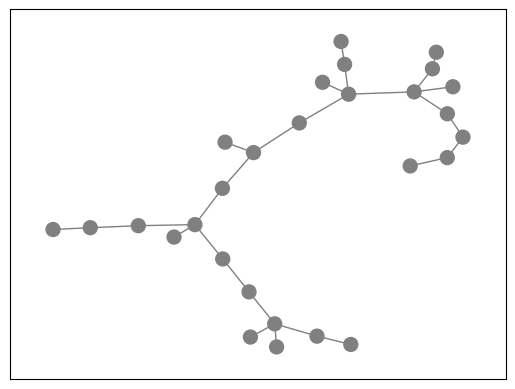

In [16]:
pos = data_analyzer.draw_graph(og_inst)

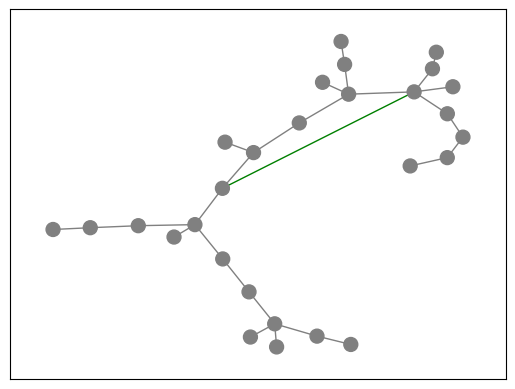

In [17]:
data_analyzer.draw_counterfactual_actions(og_inst, cf_inst, position=pos)

#### Instance with cycles

In [18]:
instance_id = 3

exp = evaluator.explanations[instance_id]
og_inst = exp.input_instance
cf_inst = exp.counterfactual_instances[0]

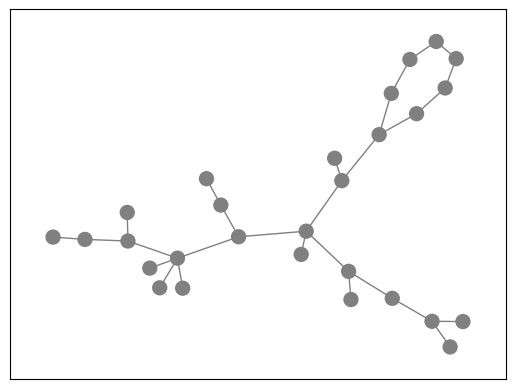

In [21]:
pos = data_analyzer.draw_graph(og_inst)

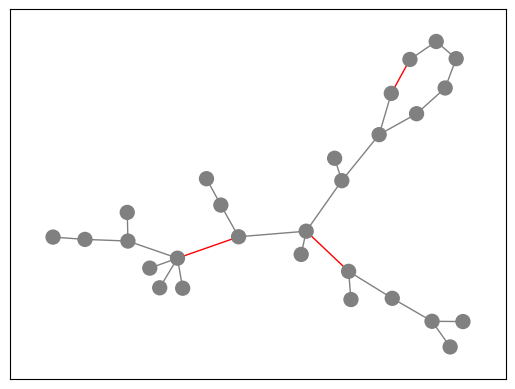

In [22]:
data_analyzer.draw_counterfactual_actions(og_inst, cf_inst, position=pos)